<a href="https://colab.research.google.com/github/bruce-kelly/machine-learning-projects/blob/main/NLP_yelp_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Yelp Review NLP Customer Sentiment Analysis

In this project I will use NLP techniques to analyze 10,000 Yelp reviews, and then create a classifier that can determine whether or not someone had a good experience.

Phases of this project are as follows:

- Import libraries
- Import Dataset
- Visualize the Dataset
- Data Cleaning & Feature Engineering
- Create Training & Test Sets
- Train & Fit the Model
- Model Evaluation
- Conclusion

---

## Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/colab_datasets/yelp_reviews.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.keys()

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [6]:
len(df) # returned N

10000

## Visualize the Dataset

Create an additional feature called 'length', based on the text column's length

In [7]:
df['length'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


Let's see the distribution of review lengths

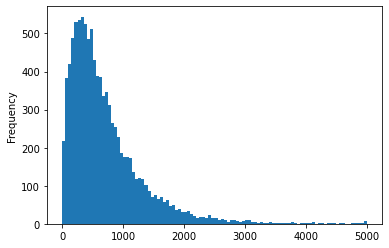

In [8]:
df['length'].plot(bins = 100, kind = 'hist')

And the distribution of the ratings

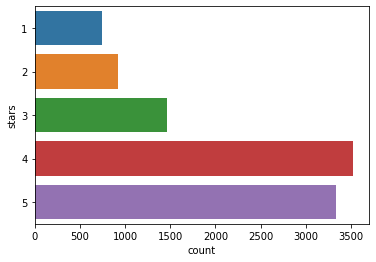

In [9]:
sns.countplot(data=df, y='stars')
plt.show()

We can create a facet grid to see how these two factors interact

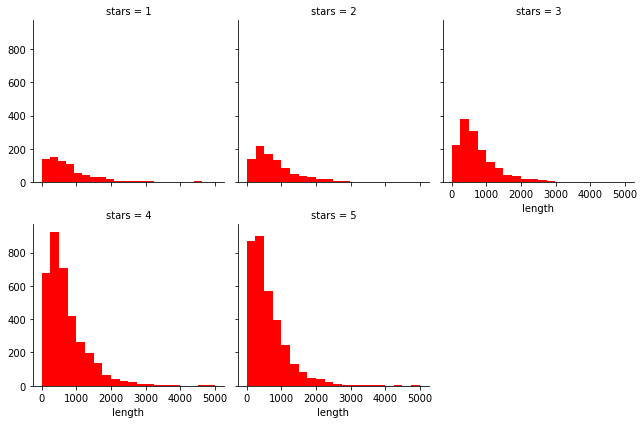

In [10]:
# Create the grid
g = sns.FacetGrid(data=df, col='stars', col_wrap = 3)
# populate by mapping
g.map(plt.hist, 'length', bins=20, color='r')
plt.show()

#### Comparing & Contrasting the extremes - 1 Star vs 5 Star reviews

In [11]:
df_1star = df[ df['stars'] == 1 ]
df_1star.shape

(749, 11)

In [12]:
df_5star = df[ df['stars'] == 5 ]
df_5star.shape

(3337, 11)

Concatenate both dataframes to create an 'extremes' df

In [13]:
df_extremes = pd.concat([ df_1star, df_5star])
df_extremes.shape

(4086, 11)

In [14]:
print('1-Star Review Percentage = ', (len(df_1star)/len(df_extremes))*100, '%')

1-Star Review Percentage =  18.330885952031327 %


In [15]:
print('5-Star Review Percentage = ', (len(df_5star)/len(df_extremes))*100, '%')

5-Star Review Percentage =  81.66911404796868 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


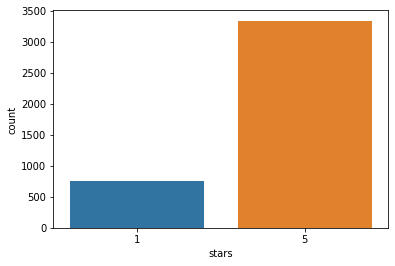

In [16]:
sns.countplot(df_extremes['stars'], label = 'Count')

## Data Cleaning & Feature Engineering

#### 1. Import Tools & Create Cleaning Function

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('all')

In [19]:
def message_cleaning(message):
  punc_removed = [char for char in message if char not in string.punctuation]
  punc_removed_join = ''.join(punc_removed)
  punc_removed_join_clean = [ word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return punc_removed_join_clean

In [20]:
df_clean = df_extremes['text'].apply(message_cleaning)
df_clean

23      [U, go, n, check, car, u, wanna, buy, 1, Thats...
31      [Disgusting, Groupon, daughter, tried, outdate...
35      [Ive, eaten, many, times, none, bad, last, nig...
61      [always, fan, Burlingtons, deals, however, sho...
64      [Another, night, meeting, friends, laugh, Wait...
                              ...                        
9990    [Yes, rock, hipster, joints, dig, place, littl...
9991    [4, stars, notes, folks, rated, place, low, mu...
9992    [Im, normally, one, jump, reviewing, chain, re...
9994    [Lets, seewhat, like, Surprise, Stadium, Well,...
9999    [45, locations, 45, star, average, think, Ariz...
Name: text, Length: 4086, dtype: object

In [21]:
print(df_extremes['text'][0]) # original

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [22]:
print(df_clean[0]) # cleaned

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


#### 2. Count Vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# analyzer will apply the cleaning function
vectorizer = CountVectorizer(analyzer = message_cleaning)
# df_countvectorizer will now perform everything at once - cleaning and vectorizing
df_countvectorizer = vectorizer.fit_transform(df_extremes['text'])

In [24]:
# get_feature_names() is deprecated, use _out() instead
print(vectorizer.get_feature_names_out())

['0' '00s' '01042012' ... 'École' 'éclairs' 'ém']


In [25]:
df_countvectorizer.shape

(4086, 26435)

## Create Training & Test Sets

In [26]:
X = df_countvectorizer
X.shape

(4086, 26435)

In [27]:
label = df_extremes['stars'].values
y = label
y.shape

(4086,)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape

(3268, 26435)

In [30]:
X_test.shape

(818, 26435)

In [31]:
y_train.shape

(3268,)

In [32]:
y_test.shape

(818,)

## Train & Fit the Model

In [33]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()


In [34]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

## Model Evaluation

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([5, 5, 5, ..., 5, 1, 5])

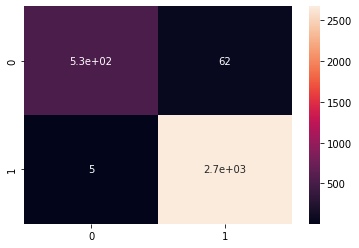

In [36]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

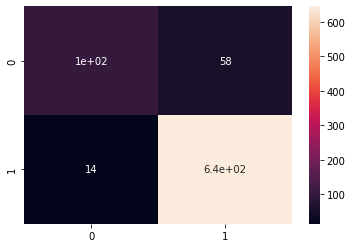

In [37]:
y_predict_test = NB_classifier.predict(X_test)
y_predict_test
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [38]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.88      0.64      0.74       159
           5       0.92      0.98      0.95       659

    accuracy                           0.91       818
   macro avg       0.90      0.81      0.84       818
weighted avg       0.91      0.91      0.91       818



## Conclusion

In this model, we were able to use Natural Language Processing techniques to achieve 91% precision when trained on a dataset of 1-star and 5-star reviews from Yelp.